In [12]:
import pandas_datareader as pdr 
import pandas_datareader.data as wb
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [6]:
estudos_diabetes = pd.read_csv('pima-data.csv', sep=',', encoding = "ISO-8859-1")

In [7]:
estudos_diabetes.describe()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin
count,768.000000,768.000000,767.000000,765.000000,767.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.112125,20.528105,79.903520,31.992578,0.471876,33.240885,0.809136
std,3.369578,31.972618,19.367558,15.941428,115.283105,7.884160,0.331329,11.760232,0.628517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.372500,29.000000,0.906200
75%,6.000000,140.250000,80.000000,32.000000,127.500000,36.600000,0.626250,41.000000,1.260800
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,3.900600


In [8]:
estudos_diabetes.isnull().any()

num_preg        False
glucose_conc    False
diastolic_bp     True
thickness        True
insulin          True
bmi             False
diab_pred       False
age             False
skin            False
diabetes        False
dtype: bool

In [9]:
estudos_diabetes[(estudos_diabetes == 0).any(1)]

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72.0,35.0,0.0,33.6,0.627,50,1.3790,True
1,1,85,66.0,29.0,0.0,26.6,0.351,31,1.1426,False
2,8,183,NaN,0.0,0.0,23.3,0.672,32,0.0000,True
3,1,89,66.0,NaN,94.0,28.1,0.167,21,0.9062,False
4,0,137,40.0,35.0,168.0,43.1,2.288,33,1.3790,True
5,5,116,74.0,0.0,0.0,25.6,0.201,30,0.0000,False
7,10,115,0.0,0.0,0.0,35.3,0.134,29,0.0000,False
9,8,125,96.0,0.0,0.0,0.0,0.232,54,0.0000,True
10,4,110,92.0,0.0,0.0,37.6,0.191,30,0.0000,False
11,10,168,74.0,NaN,0.0,38.0,0.537,34,0.0000,True


In [10]:
estudos_diabetes.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141854,-0.077766,-0.072753,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.153644,0.055708,0.330962,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141854,0.153644,1.000000,0.208087,0.086241,0.281662,0.041485,0.239504,0.207161,0.065621
thickness,-0.077766,0.055708,0.208087,1.000000,0.432856,0.395593,0.187048,-0.117621,1.000000,0.074865
insulin,-0.072753,0.330962,0.086241,0.432856,1.000000,0.197701,0.185162,-0.042272,0.436227,0.131984
bmi,0.017683,0.221071,0.281662,0.395593,0.197701,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041485,0.187048,0.185162,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239504,-0.117621,-0.042272,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207161,1.000000,0.436227,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065621,0.074865,0.131984,0.292695,0.173844,0.238356,0.074752,1.000000


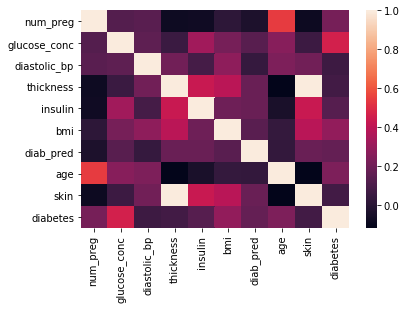

In [15]:
sns.heatmap(estudos_diabetes.corr())

In [19]:
pima_data_norm = estudos_diabetes.drop(['thickness'], axis = 1)

In [20]:
pima_data_norm.to_csv("pima_norm_2.csv")

In [27]:
pima_data_norm.isnull().any()

num_preg        False
glucose_conc    False
diastolic_bp     True
insulin          True
bmi             False
diab_pred       False
age             False
skin            False
diabetes        False
dtype: bool

In [28]:
pima_data_norm.isin([0]).sum()

num_preg        111
glucose_conc      5
diastolic_bp     35
insulin         373
bmi              11
diab_pred         0
age               0
skin            227
diabetes        500
dtype: int64

In [30]:
pima_data_norm["glucose_conc"] = pima_data_norm["glucose_conc"].replace(0, pima_data_norm["glucose_conc"].mean())

In [31]:
pima_data_norm.isin([0]).sum()

num_preg        111
glucose_conc      0
diastolic_bp     35
insulin         373
bmi              11
diab_pred         0
age               0
skin            227
diabetes        500
dtype: int64

In [32]:
pima_data_norm["skin"] = pima_data_norm["skin"].replace(0, pima_data_norm["glucose_conc"].mean())

In [33]:
pima_data_norm.isin([0]).sum()

num_preg        111
glucose_conc      0
diastolic_bp     35
insulin         373
bmi              11
diab_pred         0
age               0
skin              0
diabetes        500
dtype: int64